In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will print the Sign Language image that we can see in the above list of files.

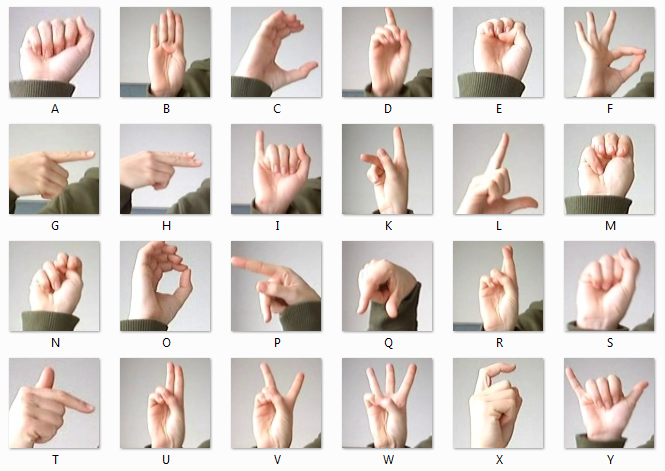

In [2]:
from IPython.display import Image
Image(r'C:\Users\DELL\Downloads\archive\amer_sign2.png')


We will read the training and test CSV files

In [3]:
X_for_train=pd.read_csv(r'C:\Users\DELL\Downloads\archive\sign_mnist_train.csv')
X_for_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
X_for_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [5]:
X_for_test=pd.read_csv(r'C:\Users\DELL\Downloads\archive\sign_mnist_test.csv')
X_for_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
X_for_test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [7]:
print(X_for_train.shape)
print(X_for_test.shape)

(27455, 785)
(7172, 785)


In [8]:
#784 pixels we have , its a 28*28 image

In [8]:
Y_train=X_for_train['label'].values

In [9]:
Y_train

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [10]:
np.unique(Y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

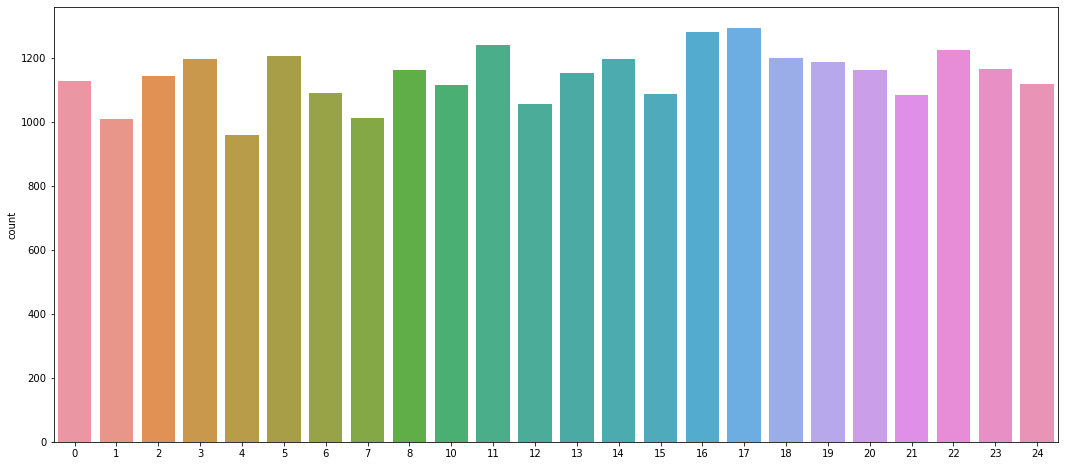

In [11]:
#plotting the quantities in each class
plt.figure(figsize=(18,8))
sns.countplot(x=Y_train)

In [12]:
X_for_train.drop('label',axis=1,inplace=True)


In [13]:
X_train=X_for_train
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [14]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Text(0.5, 1.0, 'I')

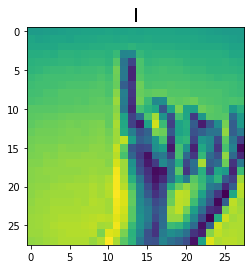

In [15]:
images=X_train.values
images=np.array([np.reshape(i,(28,28)) for i in images])
plt.imshow(images[6])
plt.title(class_names[Y_train[6]],fontsize=20)

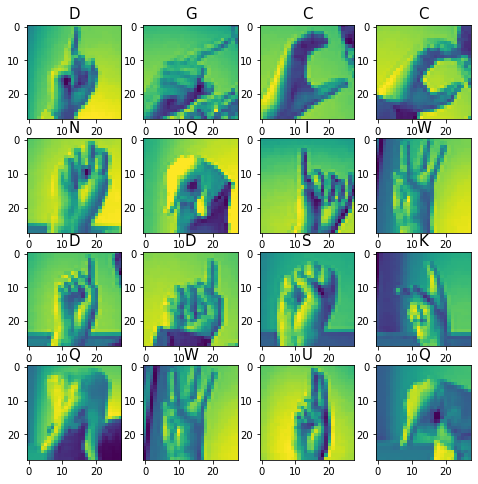

In [16]:
fig=plt.figure(figsize=(8,8))
for i in range(16):
    ax=fig.add_subplot(4,4,i+1)
    ax.imshow(images[i])
    ax.set_title(class_names[Y_train[i]], fontsize = 15)
plt.show()

In [17]:
#normalize training and testing dataset
X_train=X_train/255.0
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961


In [18]:
Y_test=X_for_test['label'].values
Y_test

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [19]:
X_for_test.drop('label',axis=1,inplace=True)


In [20]:
X_test=X_for_test
X_test=X_test/255.0
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.584314,0.584314,0.588235,0.588235,0.588235,0.592157,0.592157,0.588235,0.592157,0.596078,...,0.541176,0.580392,0.498039,0.349020,0.321569,0.376471,0.415686,0.439216,0.470588,0.419608
1,0.494118,0.501961,0.513725,0.517647,0.521569,0.525490,0.529412,0.529412,0.533333,0.541176,...,0.184314,0.407843,0.760784,0.717647,0.729412,0.721569,0.721569,0.721569,0.713725,0.705882
2,0.333333,0.345098,0.360784,0.376471,0.411765,0.482353,0.529412,0.560784,0.576471,0.596078,...,0.266667,0.650980,0.949020,0.890196,0.901961,0.890196,0.886275,0.882353,0.878431,0.870588
3,0.796078,0.803922,0.811765,0.807843,0.811765,0.819608,0.823529,0.819608,0.823529,0.819608,...,0.603922,0.972549,0.968627,0.972549,0.992157,0.925490,0.901961,0.941176,0.992157,1.000000
4,0.737255,0.749020,0.756863,0.764706,0.780392,0.788235,0.792157,0.796078,0.796078,0.796078,...,0.101961,0.156863,0.250980,0.188235,0.113725,0.180392,0.192157,0.180392,0.180392,0.207843


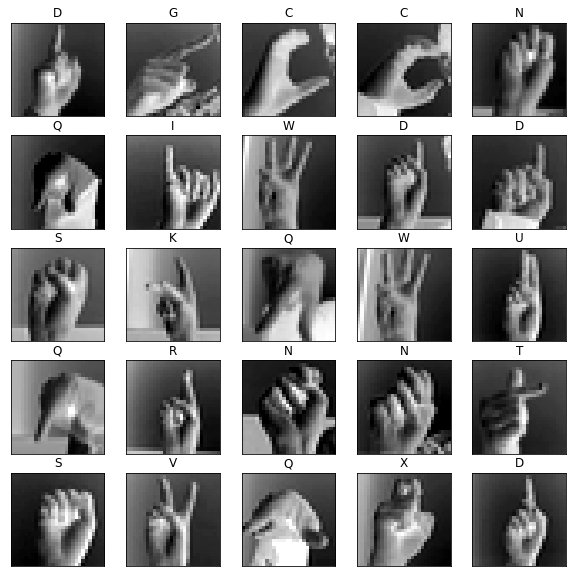

In [21]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(Y_train[i])
    plt.title(class_names[label_index])
plt.show()


In [22]:
import cv2
import numpy as np
for i in range(0,10):
    rand=np.random.randint(0,len(images))
    input_im=images[rand]
    
    sample=input_im.reshape(28,28).astype(np.uint8)
    sample=cv2.resize(sample,None,fx=10,fy=10,interpolation=cv2.INTER_CUBIC)
    sample=cv2.adaptiveThreshold(sample,200,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [24]:
##Split the training and test sets
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate=train_test_split(X_train,Y_train,test_size=0.2,random_state = 12345)
print(x_train.shape)
print(y_train.shape)
print(x_validate.shape)
print(y_validate.shape)

(21964, 784)
(21964,)
(5491, 784)
(5491,)


In [25]:
#reshape into 28*28*1
x_train=np.array(x_train).reshape(-1,28,28,1)
x_validate=np.array(x_validate).reshape(-1,28,28,1)
X_test = np.array(X_test).reshape(-1,28,28,1)

In [26]:
print(x_train.shape)
print(x_validate.shape)
print(X_test.shape)

(21964, 28, 28, 1)
(5491, 28, 28, 1)
(7172, 28, 28, 1)


# Convolutional Neural Network

In [27]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model=Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu')) #convolutional layer
model.add(MaxPooling2D(pool_size = (2, 2)))#maxpooling 
model.add(Dropout(0.25)) # to overcome overfitting

model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#adding fully connected layer
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 25, activation = 'softmax'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [29]:
#compiling
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [30]:
#train the model
history = model.fit(x_train, y_train, batch_size = 512, epochs = 20, verbose = 1, validation_data = (x_validate, y_validate))

Epoch 1/20
43/43 [==============================] - 21s 478ms/step - loss: 3.1512 - accuracy: 0.0625 - val_loss: 2.9387 - val_accuracy: 0.1255
Epoch 2/20
43/43 [==============================] - 20s 455ms/step - loss: 2.5383 - accuracy: 0.2024 - val_loss: 1.9190 - val_accuracy: 0.4185
Epoch 3/20
43/43 [==============================] - 22s 518ms/step - loss: 1.7602 - accuracy: 0.4126 - val_loss: 1.2854 - val_accuracy: 0.5810
Epoch 4/20
43/43 [==============================] - 20s 472ms/step - loss: 1.3188 - accuracy: 0.5501 - val_loss: 0.8999 - val_accuracy: 0.7254
Epoch 5/20
43/43 [==============================] - 19s 444ms/step - loss: 1.0212 - accuracy: 0.6442 - val_loss: 0.6743 - val_accuracy: 0.7858
Epoch 6/20
43/43 [==============================] - 21s 497ms/step - loss: 0.8371 - accuracy: 0.7077 - val_loss: 0.5086 - val_accuracy: 0.8452
Epoch 7/20
43/43 [==============================] - 22s 510ms/step - loss: 0.7029 - accuracy: 0.7565 - val_loss: 0.4131 - val_accuracy: 0.8825

Text(0.5, 1.0, 'Loss evolution')

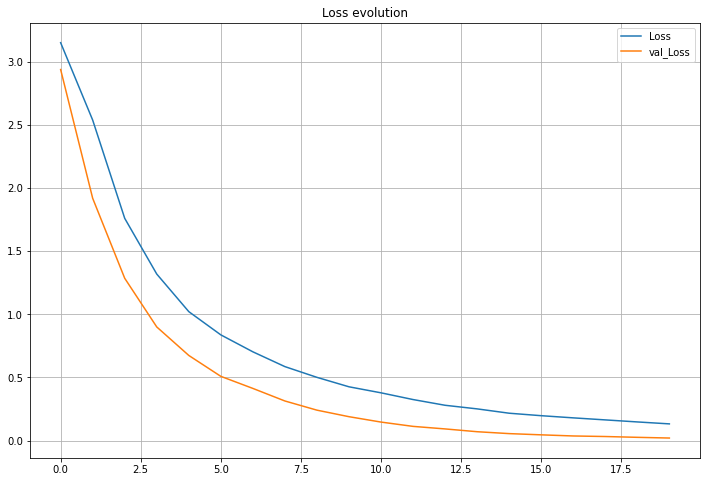

In [31]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))


plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')


Text(0.5, 1.0, 'Accuracy evolution')

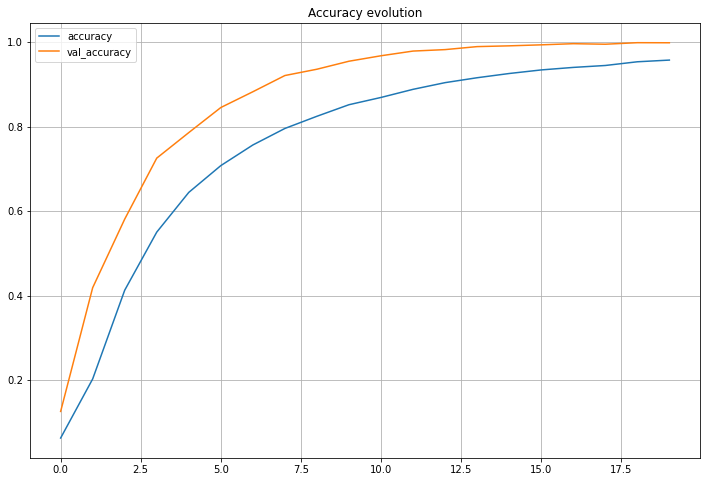

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [33]:
#loss and accuracy for testing dataset
test_loss,test_acc=model.evaluate(X_test,Y_test)
print('Test Loss is: ',test_loss)
print('Test Accuracy is: ',test_acc)

225/225 [==============================] - 2s 8ms/step - loss: 0.2113 - accuracy: 0.9260
Test Loss is:  0.21131838858127594
Test Accuracy is:  0.9259620904922485


Vizualizing predictions

In [34]:
predicted_classes = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


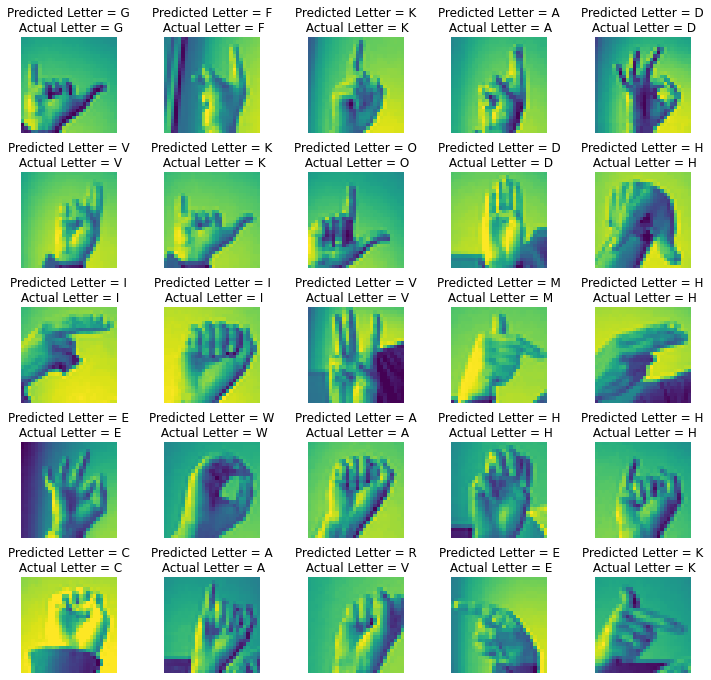

In [35]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(x_validate[i].reshape(28,28))
    axes[i].set_title(f"Predicted Letter = {class_names[predicted_classes[i]]}\n Actual Letter = {class_names[Y_test[i]]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

As we can see in the above visualization, the CNN model has predicted the correct class labels for almost all the images. Now we will see the full classification report using a normalized and non-normalized confusion matrices. 

Text(159.0, 0.5, 'True label')

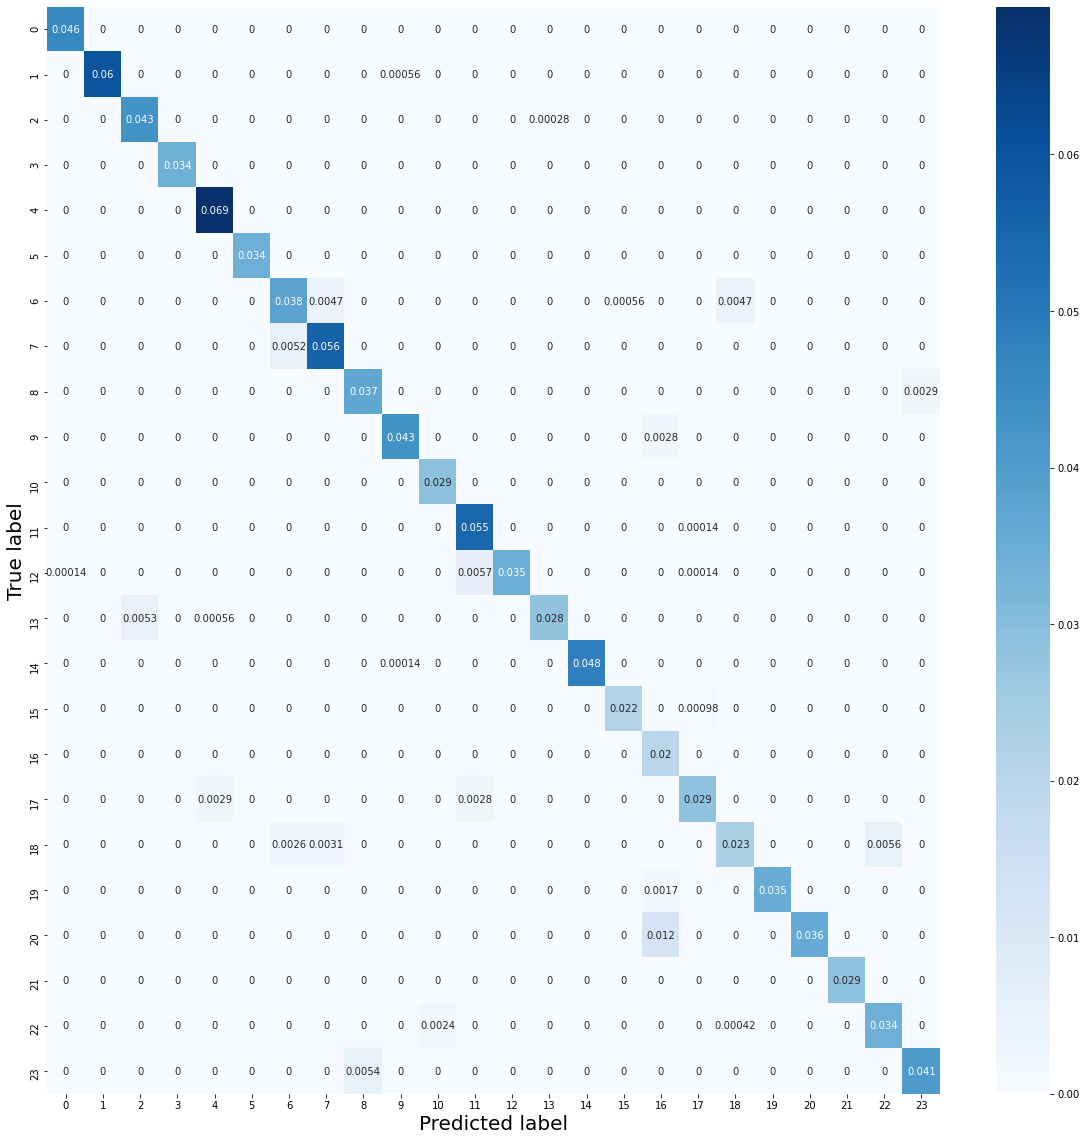

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize=(20,20))
sns.heatmap(cm/np.sum(cm),annot=True,cmap='Blues')
plt.xlabel('Predicted label',fontsize=20)
plt.ylabel('True label',fontsize=20)

In [52]:
model.save("my_model")
model.save_weights("weights.h5")

#from tensorflow import keras
#my_model = keras.models.load_model('my_model')
#my_model.load_weights("weights.h5")

INFO:tensorflow:Assets written to: my_model\assets
